In [1]:
import mlgrad.pca as pca
import mlgrad.avragg as avragg
import mlgrad.distance as distance
import mlgrad.func as func
# import mlgrad.func2 as func2

from mlgrad import erm_fg, erm_sg, erm_irgd, fg, fg_rud, sg, weights, averager_it, erisk

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-notebook', 'seaborn-white', 'seaborn-ticks'])

In [2]:
df = pd.read_csv("data/starsCYG.csv", sep=',', usecols=["log.Te", "log.light"], )
df[:10]

,log.Te,log.light
0,4.37,5.23
1,4.56,5.74
2,4.26,4.93
3,4.56,5.74
4,4.30,5.19
5,4.46,5.46
6,3.84,4.65
7,4.57,5.27
8,4.26,5.57
9,4.37,5.12


In [3]:
X = df["log.Te"].values.reshape((-1,1))
X = np.asarray(X, "d")
Y = df["log.light"].values

# X = np.log(X)
# Y = np.log(Y)

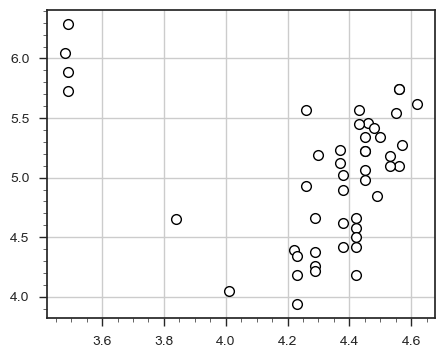

In [4]:
plt.figure(figsize=(5.0, 4.0))
plt.scatter(X, Y, s=49, c='w', edgecolors='k', linewidth=1.)
plt.minorticks_on()
plt.grid(1)
plt.show()

In [5]:
XY = np.c_[X, Y]
print(len(XY))

47


In [6]:
avg = avragg.WMAverage(averager_it(func.QuantileFunc(0.85, func.Sqrt(0.001))))
# reg = func.Absolute()
mlse = mls.MLocationScatterEstimator(avg, n_step=30, reg=None, h=0.01)
mlse.fit(XY)

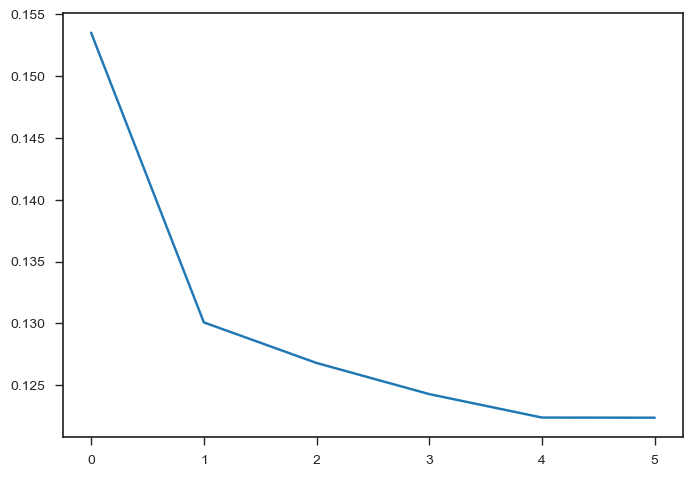

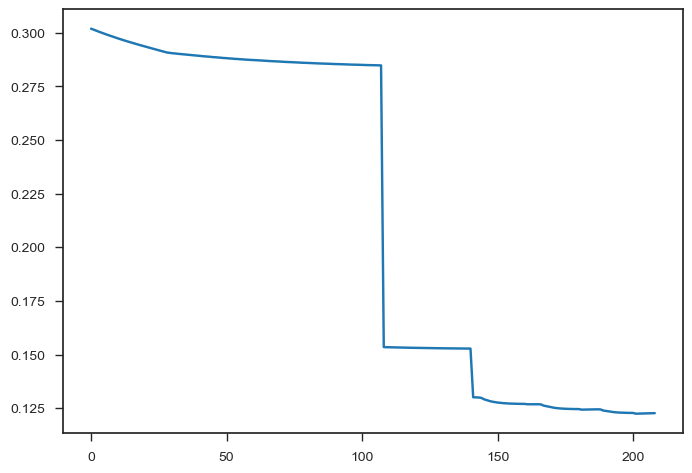

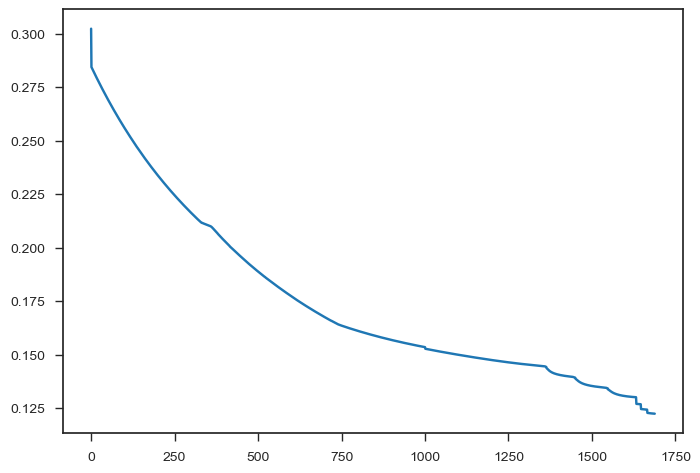

In [7]:
plt.plot(mlse.dvals)
plt.show()
plt.plot(mlse.mlocation.dvals)
plt.show()
plt.plot(mlse.mscatter.dvals)
plt.show()

In [8]:
loc, S = mlse.loc.base, mlse.S.base
distfunc = mlse.distfunc

loc0 = mls.standard_location(XY)
S0 = mls.standard_covariance(XY, loc0)
distfunc0 = distance.MahalanobisDistance(np.linalg.inv(S0.T))

In [9]:
print(loc)
print(S)
print(mlse.K)

[4.38591554 4.89992916]
[[0.36148745 0.38503201]
 [0.38503201 3.17645785]]
6


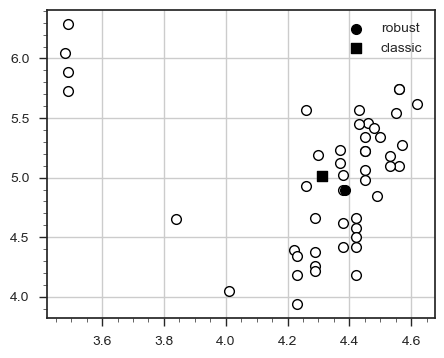

In [10]:
plt.figure(figsize=(5.0, 4.0))
plt.scatter(X, Y, s=49, c='w', edgecolors='k', linewidth=1.)
plt.scatter([loc[0]], [loc[1]], s=49, c='k', edgecolors='k', linewidth=1., marker='o', label='robust')
plt.scatter([loc0[0]], [loc0[1]], s=49, c='k', edgecolors='k', linewidth=1., marker='s', label='classic')
plt.minorticks_on()
plt.grid(1)
plt.legend()
plt.show()

In [11]:
# plt.figure(figsize=(5.0, 4.0))
# D0 = [distfunc0(xy, loc0) for xy in XY]
# D = [mlse.distfunc(xy, loc) for xy in XY]
# plt.scatter(D0, D, c='w', edgecolors='k', linewidth=1)
# plt.xlabel('Classic distance')
# plt.ylabel('Robust distance')
# plt.title('starsCYG [log.Te, log.light]')
# plt.savefig('fig/robust_clustering_distance_stars.eps')
# plt.grid(1)
# plt.minorticks_on()
# plt.show()

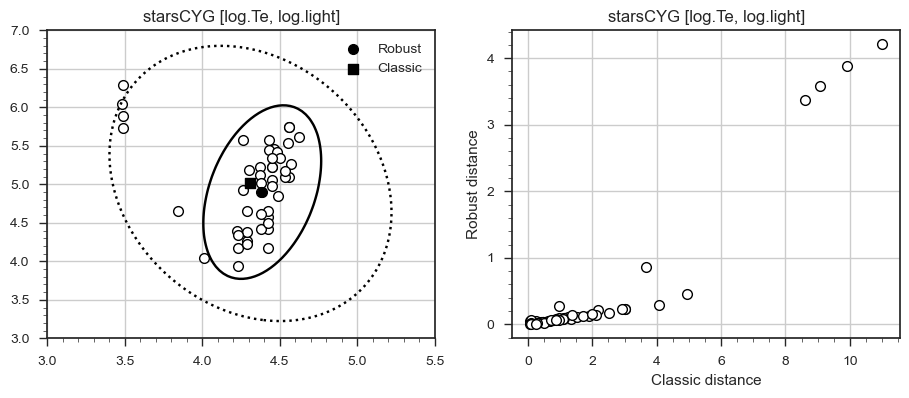

In [12]:
# eigval, eigvecs = np.linalg.eig(distfunc.S)
# eigval0, eigvecs0 = np.linalg.eig(distfunc0.S)
# print(eigval)
# print(eigval0)
# print(eigvecs)
# print(eigvecs0)
plt.figure(figsize=(11.0, 4.0))
plt.subplot(1,2,1)
plt.scatter(X, Y, s=49, c='w', edgecolors='k', linewidth=1.)
plt.scatter([loc[0]], [loc[1]], s=49, c='k', edgecolors='k', linewidth=1., marker='o', label='Robust')
plt.scatter([loc0[0]], [loc0[1]], s=49, c='k', edgecolors='k', linewidth=1., marker='s', label='Classic')
# plt.plot([loc[0]-eigvecs[0,0], loc[0], loc[0]+eigvecs[0,0]], 
#          [loc[1]-eigvecs[1,0], loc[1], loc[1]+eigvecs[1,0]], color='k')
# plt.plot([loc[0]-eigvecs[0,1], loc[0], loc[0]+eigvecs[0,1]], 
#          [loc[1]-eigvecs[1,1], loc[1], loc[1]+eigvecs[1,1]], color='k')
# plt.plot([loc0[0]-eigvecs0[0,0], loc0[0], loc0[0]+eigvecs0[0,0]], 
#          [loc0[1]-eigvecs0[1,0], loc0[1], loc0[1]+eigvecs0[1,0]], color='k', linestyle='--')
# plt.plot([loc0[0]-eigvecs0[0,1], loc0[0], loc0[0]+eigvecs0[0,1]], 
#          [loc0[1]-eigvecs0[1,1], loc0[1], loc0[1]+eigvecs0[1,1]], color='k', linestyle='--')
xrange = np.linspace(3., 5.5, 100)
yrange = np.linspace(3., 7., 100)
XX2, YY2 = np.meshgrid(xrange, yrange)
XY2 = np.c_[XX2.ravel(), YY2.ravel()]
D = np.array([distfunc(loc, xy) for xy in XY2])
D_s = D.reshape(XX2.shape)
D0 = np.array([distfunc0(loc0, xy) for xy in XY2])
D0_s = D0.reshape(XX2.shape)
plt.contour(XX2, YY2, D_s, levels=[0.,0.4])
plt.contour(XX2, YY2, D0_s, levels=[0., 10.0], linestyles='dotted')
plt.minorticks_on()
plt.grid(1)
plt.legend()
# plt.xlim(3.25, 5)
# plt.ylim(-2, 12)
plt.title('starsCYG [log.Te, log.light]')
plt.subplot(1,2,2)
D0 = [distfunc0(xy, loc0) for xy in XY]
D = [distfunc(xy, loc) for xy in XY]
plt.scatter(D0, D, c='w', edgecolors='k', linewidth=1)
plt.xlabel('Classic distance')
plt.ylabel('Robust distance')
plt.title('starsCYG [log.Te, log.light]')
plt.savefig('fig/robust_clustering_distance_stars.eps')
plt.grid(1)
plt.minorticks_on()
plt.savefig('fig/robust_location_scatter_stars.eps')
plt.show()

In [13]:
40/47

0.851063829787234